#### Core Thermal History

The geodynamo is powered by cooling of the core and release of light elements from a freezing inner core through the resulting convection. Paleomagnetic measurements tell us that a global interally generated magnetic field has apperntly existed for the majority of Earth's history, well before the inner core first nucleated. Thermal history models allow us to understand how the core might have evolved over time whilst maintaining a magnetic field.

Convection is driven by tiny thermal/compositional perturbations in the core and so when looking at the long-term evolution of the core, these average out to a steady adiabatic state. As such thermal history models consider variations in temperature, melting temperature, density, pressure etc. in radius only with the specific patterns of convection not needing consideration.

For the core to generate a magnetic field the entropy of ohmic dissipation must be positive. That is to say that the entropy budget has room for a magnetic field and as such will looses energy through ohmic dissipation and therefore be an entropy source. The model is therefore concerned with calculating necessary information to evaluate Ej at each time step. This involves knowing things like:
* the core cooling rate
* growth of the inner core
* release of light elements from the inner core
* radial structure of core properties (e.g. temperature, density)

which are dependent on data from mineral physics and seismology like:
* density
* thermal conductivity
* light element concentration
* melting temperature of iron
* melting temperature depression due to LE.

and finally this is all tied together with a boundary condition on the heat flow at the CMB.


This notebook goes through some of the functions of the included 'thermal_history' python package. A model for an adiabatic core is set up, run and the results are plotted. Not all functions are demonstrated here but an overview of the modules within is provided below:

>**thermal_history (package)**

>> **model_classes**: classes for adiabatic core, mantle and stable layer.

>> **evolution**: functions that contain the workflow for evolving a model 1 time step.

>> **core (sub-package)**

>>> **profiles**: evaluating radial profiles for core properties (temperature, density, conductivity etc.)

>>> **chemistry**: functions relating to core chemistry

>>> **energy**: functions relating to core energy/entropy

>> **stable_layer (sub-package)**

>>> **functions**: functions required for stable layer evolution. Contains the CN 'diffusion' function.



Here we will ignore anything and everything to do with stable layers (still working on it!) so we will just be considering the 'core' models.

The general method for using the code is to intialise a model with the relavant model class from thermal_history.model_classes module. core_class will use core_parameters.py (an example is provided) which contains all the intial conditions and core properties. Then iterate time stepping the model with the 'core_class.evolve' and 'thermal_history.evolution.update' functions until it has run for the desired length. What is calculated at each time step is delt with in the 'thermal_history.evolution.core_evolution' function. This is all demonstrated below:

In [1]:
#As with most python scripts, we will probably endup using these
import numpy as np
import matplotlib.pyplot as plt

In [2]:
#Import the python class for an adiabatic core model
from thermal_history.model_classes import core_class

core = core_class()

**When initialised the core class imports the core_parameters.py module from the current working directory. Everything within the module is passed into the model class.**

In [3]:
#Import the paramters file that this class has been initiallised with so we can compare.
import core_parameters as prm

t = core.time
ys = core.ys
print("Time = %2.0f years" % (t/ys))


#Compare values in the parameters file with that of the class to see they are the same.
print("Temperature at center: %4.1f ˚K, %4.1f ˚K" % (prm.Tcen, core.Tcen))


#Any functions defined in core_parameters.py will now also be class methods
print("Qcmb heat flow: %2.2f TW, %2.2f TW" % (prm.Qcmb_func(t)/1e12, core.Qcmb_func(t)/1e12))

Time = 4500000000 years
Temperature at center: 5583.7 ˚K, 5583.7 ˚K
Qcmb heat flow: 15.00 TW, 15.00 TW


**Assuming we are happy with the parameters specified we can time step it by some amount. By default it is set to use 1 Ma time step, however this can be set with the 'dt' keywod argument (in years!) and can be negative for a backwards in time model run.**

In [4]:
from thermal_history.evolution import update

core.evolve(dt=-1e6)
update(core_model=core)

t = core.time
ys = core.ys  #seconds in a year
print("Time = %2.0f years" % (t/ys))

print("Temperature at center: %4.1f ˚K" % core.Tcen)

Time = 4499000000 years
Temperature at center: 5583.9 ˚K


**The model can be saved with the 'save' method of the model classes. This saves all numeric attributes (ints, floats and numpy arrays) to a netcdf 4 file. The model can be saved as frequently as desired. A 'read_data' function is also provided to return a dictionary of all saved variables.**

In [5]:
core.save(filename='core_test.nc')  #default is core_output.nc. If data file already exists it is overwritten!

core_data = core.read_data()

print(core_data.keys()) #Notice all the parameters from the core_parameters.py file also get saved.


core_test.nc already exists, deleting core_test.nc

dict_keys(['it', 'ys', 'save_it', 'D_c', 'G', 'L', 'Pcmb', 'Tcen', 'adiabat', 'alpha_T', 'alpha_c', 'cp', 'dmu', 'ent_mel', 'ev', 'i_rho', 'k', 'kappa', 'kb', 'lambda_liq', 'lambda_sol', 'melt_T', 'mf_l', 'mm', 'o_rho', 'profiles_np', 'r_upper', 'ri', 'time', 'dt', 'M0', 'Ek', 'Q_upper', 'Qs', 'Es', 'Ql', 'El', 'Qg', 'Eg', 'Ej', 'dT_dt', 'dri_dt', 'dc_dt', 'conc_l', 'conc_s'])


**Example Workflow. Running the model for 4.5Ga, reading in the data and plotting the results. Data is saved every 10th data point as writing to file is the longest task in each iteration.**

In [6]:
import numpy as np
import matplotlib.pyplot as plt
from thermal_history.model_classes import core_class
from thermal_history.evolution import update

core = core_class()


for i in range(4500):
    
    core.evolve(dt=-1e6)
    update(core_model=core)
    
    if i in range(0,4500,10):            #Save every 10th data point
        core.save(print_progress=True)  #Sometimes printing the progress doesn't format correctly in jupyter notebooks if it runs too quickly
    
core.save(print_progress=True) #Save the last one
    
core_data = core.read_data()


core_output.nc already exists, deleting core_output.nc



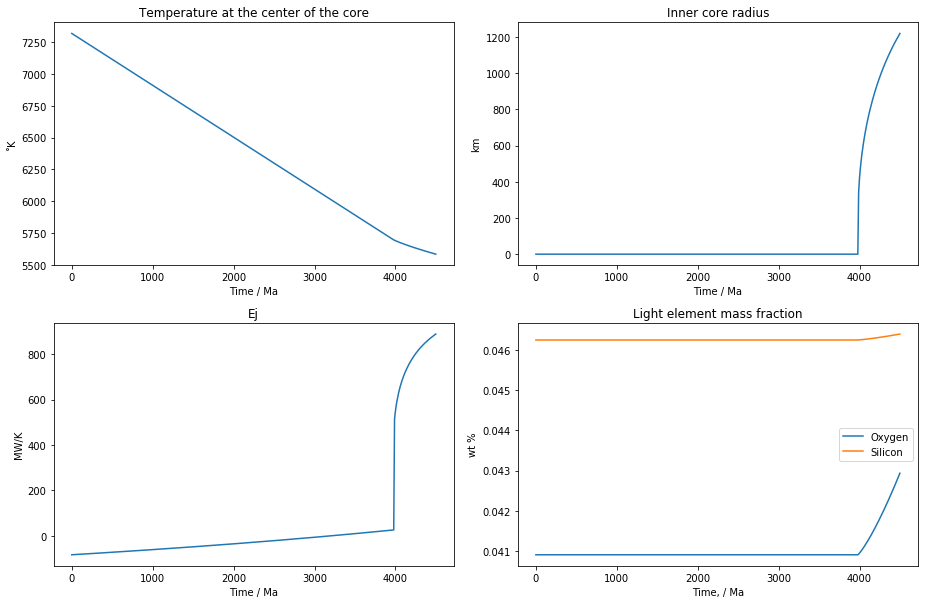

In [12]:
time = core_data['time']/(1e6*core.ys)
Tcen = core_data['Tcen']
ri = core_data['ri']/1000
Ej = core_data['Ej']/1e6
Es = core_data['Es']/1e6
El = core_data['El']/1e6
Eg = core_data['Eg']/1e6
Ek = core_data['Ek']/1e6
O = core_data['conc_l'][:,0]
Si = core_data['conc_l'][:,2]

plt.figure(figsize=(13,8.5))
plt.subplot(2,2,1)

plt.plot(time,Tcen)
plt.xlabel('Time / Ma')
plt.ylabel('˚K')
plt.title('Temperature at the center of the core')

plt.subplot(2,2,2)

plt.plot(time,ri)
plt.xlabel('Time / Ma')
plt.ylabel('km')
plt.title('Inner core radius')

plt.subplot(2,2,3)

plt.plot(time,Ej)
plt.xlabel('Time / Ma')
plt.ylabel('MW/K')
plt.title('Ej')

plt.subplot(2,2,4)

plt.plot(time,O)
plt.plot(time,Si)
plt.legend(['Oxygen','Silicon'],loc=0)
plt.xlabel('Time, / Ma')
plt.ylabel('wt %')
plt.title('Light element mass fraction')

plt.tight_layout()
plt.show()